<left><img width=25% src="img/cornell_tech2.svg"></left>

# Lecture 23: Course Overview

### Applied Machine Learning

__Volodymyr Kuleshov__<br>Cornell Tech

# Congratulations on Finishing Applied Machine Learning!

You have made it! This is our last machine learning lecture, in which we will do an overview of the diffrent algorithms seen in the course.

# A Map of Applied Machine Learning

We will go through the following map of algorithms from the course.
<center><img width=100% src="img/algorithms1.png"></center>

# Supervised Machine Learning

At a high level, a supervised machine learning problem has the following structure:

$$ \underbrace{\text{Dataset}}_\text{Features, Attributes} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer} \to \text{Predictive Model} $$

The predictive model is chosen to model the relationship between inputs and targets. For instance, it can predict future targets.

# Linear Regression

In linear regression, we fit a model
$$ f_\theta(x) := \theta^\top \phi(x) $$
that is linear in $\theta$. 

The features $\phi(x) : \mathbb{R} \to \mathbb{R}^p$ are non-linear may non-linear in $x$ (e.g., polynomial features), allowing us to fit complex functions.

<center><img width=100% src="img/algorithms3.png"></center>

# Overfitting

Overfitting is one of the most common failure modes of machine learning.
* A very expressive model (a high degree polynomial) fits the training dataset perfectly.
* The model also makes wildly incorrect prediction outside this dataset, and doesn't generalize.

# Regularization

The idea of regularization is to penalize complex models that may overfit the data.

Regularized least squares optimizes the following objective (__Ridge__).
$$ J(\theta) = \frac{1}{2n} \sum_{i=1}^n \left( y^{(i)} - \theta^\top \phi(x^{(i)}) \right)^2 + \frac{\lambda}{2} \cdot ||\theta||_2^2. $$
If we use the L1 norm, we have the __LASSO__.

<center><img width=100% src="img/algorithms4.png"></center>

# Regression vs. Classification

Consider a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We distinguish between two types of supervised learning problems depnding on the targets $y^{(i)}$. 

1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.
2. __Classification__: The target variable $y$ is discrete and takes on one of $K$ possible values:  $\mathcal{Y} = \{y_1, y_2, \ldots y_K\}$. Each discrete value corresponds to a *class* that we want to predict.

<center><img width=100% src="img/algorithms5.png"></center>

# Parametric vs. Non-Parametric Models

Nearest neighbors is an example of a *non-parametric* model.
* A parametric model $f_\theta(x) : \mathcal{X} \times \Theta \to \mathcal{Y}$ is defined by a finite set of parameters $\theta \in \Theta$ whose dimensionality is constant with respect to the dataset

* In a non-parametric model, the function $f$ uses the entire training dataset to make predictions, and the complexity of the model increases with dataset size.

* Non-parametric models have the advantage of not loosing any information at training time. 
* However, they are also computationally less tractable and may easily overfit the training set.

# Probabilistic vs. Non-Probabilistic Models

A probabilistic model is a probability distribution
$$P(x,y) : \mathcal{X} \times \mathcal{Y} \to [0,1].$$
This model can approximate the data distribution $P_\text{data}(x,y)$.

If we know $P(x,y)$, we can use the conditional $P(y|x)$ for prediction.

# Maximum Likelihood Learning

Maximum likelihood is an objective that can be used to fit any probabilistic model:
$$ \theta_\text{MLE} = \arg\max_\theta \mathbb{E}_{x, y \sim \mathbb{P}_\text{data}} \log P(x, y; \theta). $$
It minimizes the KL divergence between the model and data distributions:
$$\theta_\text{MLE} = \arg\min_\theta \text{KL}(P_\text{data} \mid\mid P_\theta).$$

# Discriminative vs. Generative Models

There are two types of probabilistic models: *generative* and *discriminative*.
\begin{align*}
\underbrace{P_\theta(x,y) : \mathcal{X} \times \mathcal{Y} \to [0,1]}_\text{generative model} & \;\; & \underbrace{P_\theta(y|x) : \mathcal{X} \times \mathcal{Y} \to [0,1]}_\text{discriminative model}
\end{align*}

We can obtain predictions from generative models via $\max_y P_\theta(x,y)$.

<center><img width=100% src="img/algorithms6.png"></center>

# The Max-Margin Principle

Intuitively, we want to select linear decision boundaries with high *margin*. 

This means that we are as confident as possible for every point and we are as far as possible from the decision boundary.

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)
iris_X, iris_y = iris.data, iris.target

# subsample to a third of the data points
iris_X = iris_X.loc[::4]
iris_y = iris_y.loc[::4]

# create a binary classification dataset with labels +/- 1
iris_y2 = iris_y.copy()
iris_y2[iris_y2==2] = 1
iris_y2[iris_y2==0] = -1

# print part of the dataset
pd.concat([iris_X, iris_y2], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,-1
4,5.0,3.6,1.4,0.2,-1
8,4.4,2.9,1.4,0.2,-1
12,4.8,3.0,1.4,0.1,-1
16,5.4,3.9,1.3,0.4,-1


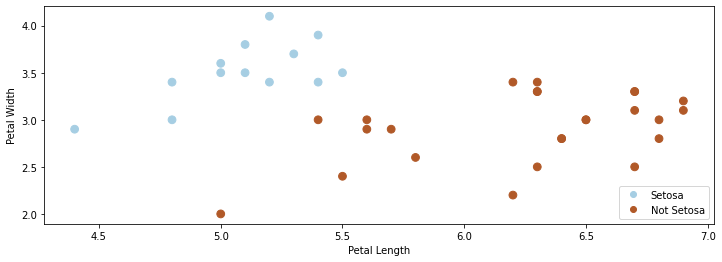

In [3]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
import warnings
warnings.filterwarnings("ignore")

# create 2d version of dataset and subsample it
X = iris_X.to_numpy()[:,:2]
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

# Plot also the training points
p1 = plt.scatter(X[:, 0], X[:, 1], c=iris_y2, s=60, cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Not Setosa'], loc='lower right')

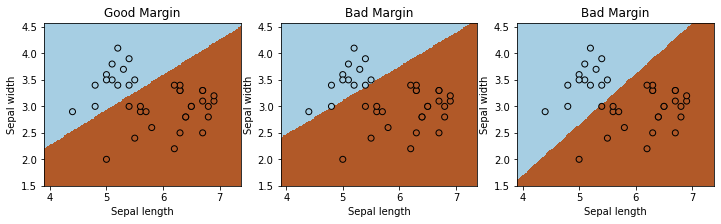

In [4]:
from sklearn.linear_model import Perceptron, RidgeClassifier
from sklearn.svm import SVC
models = [SVC(kernel='linear', C=10000), Perceptron(), RidgeClassifier()]

def fit_and_create_boundary(model):
    model.fit(X, iris_y2)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return Z

plt.figure(figsize=(12,3))
for i, model in enumerate(models):
    plt.subplot('13%d' % (i+1))
    Z = fit_and_create_boundary(model)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired) 

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=iris_y2, edgecolors='k', cmap=plt.cm.Paired)
    if i == 0:
        plt.title('Good Margin')
    else:
        plt.title('Bad Margin')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

plt.show()

<center><img width=100% src="img/algorithms7.png"></center>

# The Kernel Trick

Many algorithms in machine learning only involve dot products $\phi(x)^\top \phi(z)$ but not the features $\phi$ themselves.

We can often compute $\phi(x)^\top \phi(z)$ very efficiently for complex $\phi$ using a kernel function $K(x,z) = \phi(x)^\top \phi(z)$. This is the __kernel trick__.

<center><img width=100% src="img/algorithms8.png"></center>

# Tree-Based Models

Decision trees output target based on a tree of human-interpretable decision rules.
* __Random forests__ combine large trees using *bagging* to reduce overfitting.
* __Boosted trees__ combine small trees to reduce underfitting.

<center><img width=100% src="img/algorithms9.png"></center>

# Neural Networks

Neural network models are inspired by the brain.
* A Perceptron is an artificial model of a neuron.
* MLP stack multiple layers of artifical neurons.
* ConvNets tie the weights of neighboring neurons into receptive fields that implement the convolution operation.

<center><img width=100% src="img/algorithms10.png"></center>

# Unsupervised Learning

We have a dataset *without* labels. Our goal is to learn something interesting about the structure of the data:
* __Clusters__ hidden in the dataset.
* A __low-dimensional representation__ of the data.
* Recover the __probability density__ that generated the data.

<center><img width=100% src="img/algorithms11.png"></center>

<center><img width=100% src="img/algorithms12.png"></center>

<center><img width=100% src="img/algorithms13.png"></center>

# How To Decide Which Algorithm to Use

One factor is how much data you have. In the __small data__ (<10,000) regime, consider:
* Linear models with hand-crafted features (LASSO, LR, NB, SVMs)
* Kernel methods often work best (e.g., SVM + RBF kernel)
* Non-parametric methods (kernels, nearest neighbors) are also powerful

In the __big data__ regime,
* If using "high-level" features, gradient boosted trees are state-of-the-art
* When using "low-level" representations (images, sound signals), neural networks work best
* Linear models with good features are also good and reliable

Some additional advice:
* If interpretability matters, use decision trees or LASSO.
* When uncertainty estimates are important use probabilistic methods.
* If you know the data generating process, use generative models.

# What's Next? Ideas for Courses

Consider the following courses to keep learning about ML:
* Graduate courses in the Spring semester at Cornell (generative models, NLP, etc.)
* Masters courses: Deep Learning Clinic, ML Engineering, Data Science, etc.
* Online courses, e.g. Full Stack Deep Learning

# What's Next? Ideas for Research

In order to get involved in research, I recommend:
* Contacting research groups at Cornell for openings
* Watching online ML tutorials, e.g. NeurIPS
* Reading and implementing ML papers on your own

# What's Next? Ideas for Industry Projects

Finally, a few ideas for how to get more practice applying ML in the real world:
* Participate in Kaggle competitions and review solutions
* Build an open-source project that you like and host it on Github

# Thank You For Taking Applied Machine Learning 2020!

<left><img width=25% src="img/cornell_tech2.svg"></left>